In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 14})
import dedalus.public as d3

import logging
logger = logging.getLogger(__name__)

## Example of nongeostrophic linear stability calculation for idealized bottom frontal zones

In [31]:
from frontal_zone import *

In [ ]:
M = 4.427855905235292e-05 # strength of bottom frontal zone (sqrt of horizontal buoyancy gradient)
k = 0. # cross-slope wavenumber (l=0 isolates fastest growing baroclinic mode)

# Setup and solve eigenvalue problem for bottom frontal zone linear instability

Ls = 10. **np.linspace(-5, -2.5, 40)
growth_rates = np.zeros_like(Ls)
growth_rates_friction = np.zeros_like(Ls)
for i, L in enumerate(Ls):
    ds = bottom_frontal_zone_instability(0., 2*np.pi*L, M)
    growth_rates[i] = ds['omega'][ds['idx']].imag
    
    ds = bottom_frontal_zone_instability_horizontal_friction(0., 2*np.pi*L, M)
    growth_rates_friction[i] = ds['omega'][ds['idx']].imag

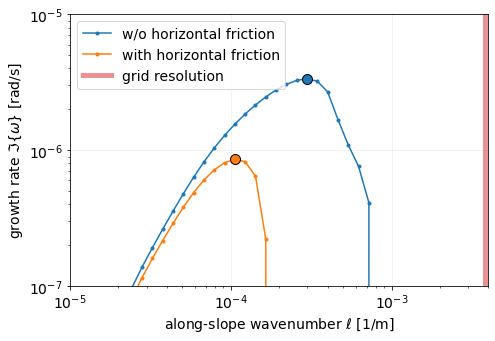

In [50]:
plt.figure(figsize=(7.5,5))
plt.ylim(1e-7, 1e-5)
plt.xlim(1e-5, 4e-3)
plt.xscale("log")
plt.yscale("log")

plt.ylabel(r"growth rate $\Im\{\omega\}$ [rad/s]")
plt.xlabel(r"along-slope wavenumber $\ell$ [1/m]")
plt.grid(True, alpha=0.2)

Λ = M**2/f
Ri = N**2/Λ**2

p = plt.plot(Ls, growth_rates, ".-", label=f"w/o horizontal friction")
idx = np.argmax(growth_rates)
plt.plot(Ls[idx], growth_rates[idx], "o", markeredgecolor="k", color=p[0].get_c(), markersize=10)

p=plt.plot(Ls, growth_rates_friction, ".-", label=f"with horizontal friction")
idx = np.argmax(growth_rates_friction)
plt.plot(Ls[idx], growth_rates_friction[idx], "o", markeredgecolor="k", color=p[0].get_c(), markersize=10)

plt.axvline(1. /250. - 2.e-4, label="grid resolution", color="C3", lw=5, alpha=0.5)
plt.legend();